In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < y < -2.5; 6 < pT < 8

Y_OS = [602.0, 621.0, 579.0, 587.0, 582.0, 583.0, 535.0, 593.0, 567.0, 506.0, 547.0, 551.0, 544.0, 
        534.0, 494.0, 465.0, 495.0, 467.0, 476.0, 474.0, 449.0, 412.0, 442.0, 447.0, 429.0, 398.0, 
        383.0, 425.0, 402.0, 382.0, 396.0, 384.0, 380.0, 350.0, 332.0, 393.0, 387.0, 436.0, 464.0, 
        521.0, 662.0, 893.0, 1289.0, 1868.0, 2356.0, 2769.0, 2563.0, 1837.0, 1123.0, 710.0, 456.0, 
        335.0, 276.0, 260.0, 232.0, 204.0, 203.0, 183.0, 195.0, 212.0, 209.0, 249.0, 223.0, 225.0, 
        196.0, 192.0, 160.0, 167.0, 161.0, 151.0, 149.0, 142.0, 135.0, 157.0, 153.0, 141.0, 160.0, 
        128.0, 136.0, 136.0, 130.0, 149.0, 127.0, 107.0, 139.0, 129.0, 134.0, 110.0, 119.0, 133.0, 
        106.0, 100.0, 118.0, 114.0, 105.0, 103.0, 98.0, 98.0, 117.0, 101.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [124.0, 112.0, 143.0, 135.0, 138.0, 107.0, 127.0, 133.0, 129.0, 112.0, 113.0, 114.0, 
        121.0, 128.0, 114.0, 120.0, 99.0, 145.0, 111.0, 122.0, 112.0, 103.0, 108.0, 106.0, 
        111.0, 115.0, 112.0, 115.0, 127.0, 118.0, 125.0, 112.0, 92.0, 127.0, 123.0, 115.0, 
        112.0, 108.0, 113.0, 88.0, 110.0, 114.0, 94.0, 100.0, 103.0, 90.0, 88.0, 87.0, 108.0, 
        90.0, 103.0, 110.0, 108.0, 106.0, 77.0, 105.0, 99.0, 102.0, 102.0, 98.0, 96.0, 97.0, 
        109.0, 108.0, 74.0, 75.0, 99.0, 112.0, 103.0, 99.0, 91.0, 93.0, 113.0, 121.0, 98.0, 
        120.0, 88.0, 91.0, 89.0, 100.0, 97.0, 78.0, 97.0, 93.0, 81.0, 83.0, 79.0, 92.0, 90.0, 
        75.0, 84.0, 81.0, 78.0, 83.0, 75.0, 71.0, 71.0, 82.0, 77.0, 70.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [4.0, 7.0, 4.0, 5.0, 6.0, 9.0, 10.0, 4.0, 5.0, 10.0, 15.0, 8.0, 14.0, 12.0, 16.0, 
          21.0, 22.0, 22.0, 24.0, 26.0, 23.0, 24.0, 33.0, 35.0, 43.0, 33.0, 50.0, 55.0, 73.0, 
          57.0, 80.0, 88.0, 113.0, 136.0, 180.0, 227.0, 272.0, 347.0, 445.0, 692.0, 965.0, 
          1638.0, 2554.0, 4356.0, 6979.0, 8892.0, 8113.0, 5162.0, 2417.0, 957.0, 407.0, 
          163.0, 103.0, 63.0, 41.0, 22.0, 22.0, 18.0, 10.0, 2.0, 5.0, 4.0, 2.0, 8.0, 3.0, 
          5.0, 1.0, 5.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 
          1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
          3.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [1.0, 1.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 4.0, 2.0, 2.0, 3.0, 0.0, 3.0, 5.0, 7.0, 4.0, 
         4.0, 11.0, 5.0, 3.0, 4.0, 2.0, 3.0, 4.0, 7.0, 4.0, 6.0, 7.0, 11.0, 9.0, 5.0, 4.0, 
         6.0, 10.0, 13.0, 13.0, 13.0, 15.0, 20.0, 20.0, 22.0, 25.0, 30.0, 20.0, 35.0, 45.0, 
         49.0, 51.0, 64.0, 86.0, 104.0, 138.0, 155.0, 233.0, 246.0, 380.0, 507.0, 845.0, 
         1328.0, 2033.0, 3081.0, 3734.0, 3460.0, 2279.0, 1127.0, 461.0, 189.0, 98.0, 45.0, 
         20.0, 19.0, 18.0, 14.0, 10.0, 10.0, 7.0, 1.0, 3.0, 4.0, 2.0, 5.0, 1.0, 4.0, 1.0, 
         3.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [5.0, 8.0, 4.0, 5.0, 6.0, 13.0, 11.0, 5.0, 9.0, 12.0, 17.0, 11.0, 14.0, 15.0, 21.0, 28.0, 
        26.0, 26.0, 35.0, 31.0, 26.0, 28.0, 35.0, 38.0, 47.0, 40.0, 54.0, 61.0, 80.0, 68.0, 89.0, 
        93.0, 117.0, 142.0, 190.0, 240.0, 285.0, 360.0, 460.0, 712.0, 985.0, 1660.0, 2579.0, 4386.0, 
        6999.0, 8927.0, 8158.0, 5211.0, 2468.0, 1021.0, 493.0, 267.0, 241.0, 218.0, 274.0, 268.0, 
        402.0, 525.0, 855.0, 1330.0, 2038.0, 3085.0, 3736.0, 3468.0, 2282.0, 1132.0, 462.0, 194.0, 
        101.0, 46.0, 24.0, 21.0, 21.0, 17.0, 10.0, 11.0, 9.0, 2.0, 3.0, 4.0, 2.0, 6.0, 2.0, 4.0, 
        1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 3.0, 1.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 67434.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, p1L1, p2L1, p3L1, alphaR1, p1R1, p2R1, p3R1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, p1L2, p2L2, p3L2, alphaR2, p1R2, p2R2, p3R2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = NA60
func_Psi = NA60
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

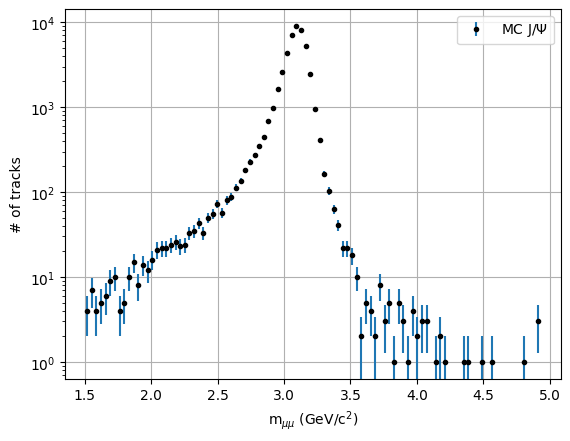

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([np.max(y_data), 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 1, 1, 1, 2.233482641523906, 1, 1, 1])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [8965.476284511493, 3.099955472811693, 0.06008355989083081, -0.8256351905980723, 0.17789752664003874, 1.2161955319254658, 0.02878473907914875, 1.859447232981265, 0.13258059050607343, 1.1797798455344177, 0.006267356948634849]
pcov: 
 [[ 4.49328430e+03  1.06933372e-02 -2.72312350e-02  6.77638619e-01
   3.63784916e-02 -1.75974446e-01 -2.84063055e-02 -1.33579212e+00
  -2.64402497e-02  3.39193427e-02 -2.85899097e-05]
 [ 1.06933372e-02  4.33029853e-07 -3.00258407e-07  5.16471757e-05
  -4.17602973e-06  1.14048156e-05  8.66347062e-07 -6.29657319e-06
   4.88543850e-07 -2.39001957e-06 -2.35033540e-07]
 [-2.72312350e-02 -3.00258407e-07  4.51108278e-07 -4.57365735e-05
   2.91655622e-06 -7.49067170e-06 -4.60092925e-07  2.68726206e-05
   7.05394943e-07 -1.76837236e-06 -1.10870601e-07]
 [ 6.77638619e-01  5.16471757e-05 -4.57365735e-05  1.45564953e-02
  -1.73655595e-03  5.43821825e-03  5.24730811e-04 -2.02383572e-03
  -9.53829869e-06 -4.46147776e-05 -7.92039907e-06]
 [ 3.63784916e-02 -4.176029

fit error : 67.03224576564092


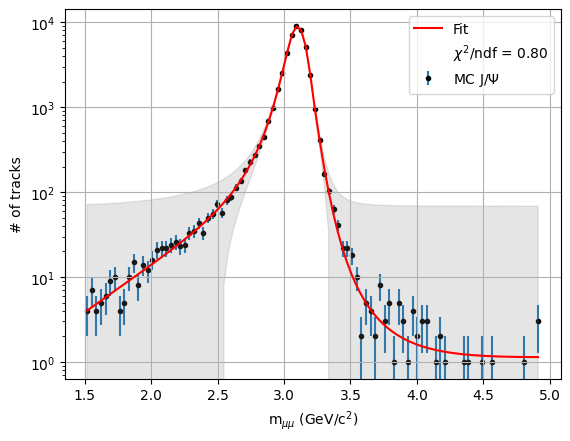

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

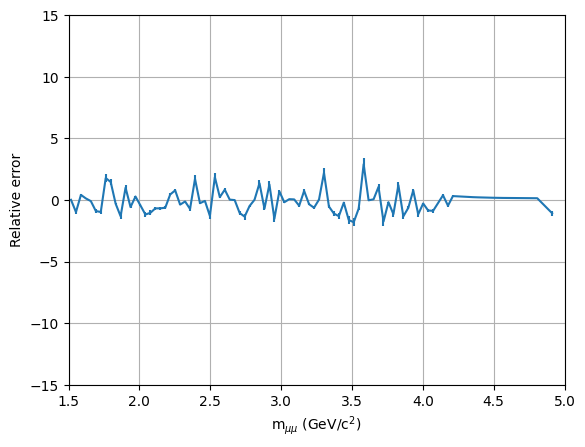

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

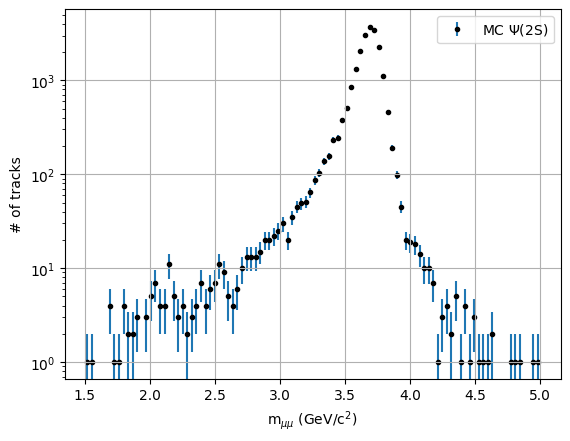

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([np.max(y_data), 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 1, 1, 1, 2.283717751711943, 1, 1, 1])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [3794.8912820578253, 3.693558492737666, 0.06357245655578371, -0.873107337501611, 0.2194298419253266, 1.0874097709827244, 0.014262988548659306, 1.8310247212857815, 0.11650548049510123, 1.3217637462370424, 0.027107790693248954]
pcov: 
 [[ 1.80706916e+03  1.16221603e-02 -2.94594022e-02  4.05289638e-01
   8.11378115e-02 -2.11178370e-01 -2.32507283e-02 -2.08410321e+00
  -1.14246480e-01  4.52038767e-01  3.65137931e-02]
 [ 1.16221603e-02  1.31609982e-06 -9.69406647e-07  1.18216441e-04
  -8.33938444e-06  1.76195775e-05  1.21618561e-06 -3.54380053e-05
  -3.85745691e-07 -1.01326288e-06 -4.61142239e-07]
 [-2.94594022e-02 -9.69406647e-07  1.39257703e-06 -1.04660655e-04
   4.99656825e-06 -1.00208805e-05 -5.33049362e-07  1.09935560e-04
   6.07875911e-06 -2.54842551e-05 -2.20714861e-06]
 [ 4.05289638e-01  1.18216441e-04 -1.04660655e-04  2.24175550e-02
  -2.63681547e-03  6.40047919e-03  5.72411774e-04 -6.25806370e-03
  -2.60080192e-04  9.74793146e-04  6.67042615e-05]
 [ 8.11378115e-02 -8.33938

fit error : 42.51074395475993


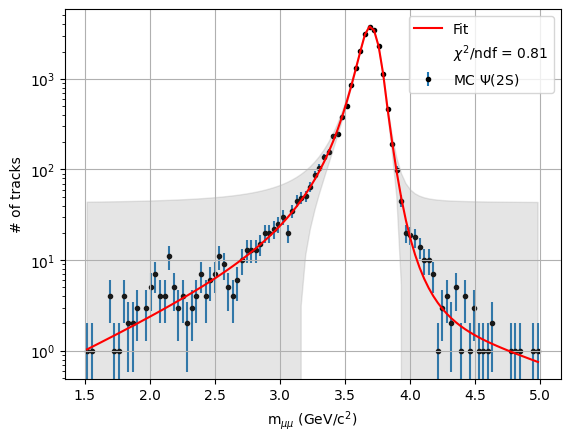

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

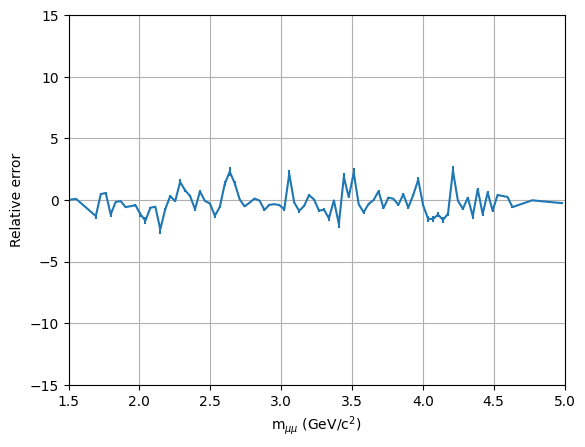

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

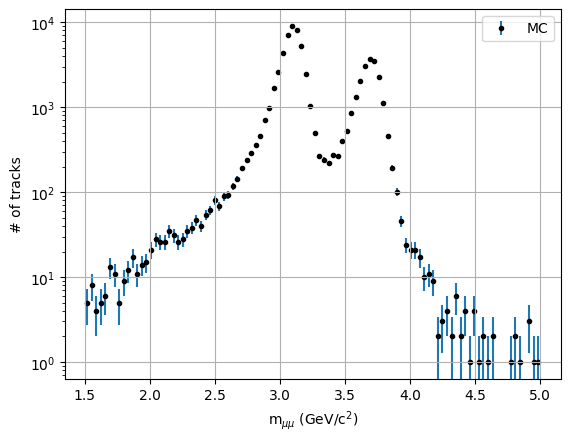

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [8954.720846922308, 3.099975322246407, 0.060192620271977464, 3792.0248876215837, 3.693554206082279, 0.06366582956696573]
pcov: 
 [[ 3.71287145e+03  3.28573373e-03 -1.34119286e-02 -1.98761283e+01
  -5.93007198e-04  7.87503337e-04]
 [ 3.28573373e-03  1.37883151e-07 -2.11585956e-08  6.21873962e-05
   2.13813620e-09 -2.64474464e-09]
 [-1.34119286e-02 -2.11585956e-08  9.36029195e-08  3.17233895e-04
   8.54933304e-09 -1.30111881e-08]
 [-1.98761283e+01  6.21873962e-05  3.17233895e-04  1.46094203e+03
   4.28281448e-03 -1.35566529e-02]
 [-5.93007198e-04  2.13813620e-09  8.54933304e-09  4.28281448e-03
   3.66312694e-07 -8.26921928e-08]
 [ 7.87503337e-04 -2.64474464e-09 -1.30111881e-08 -1.35566529e-02
  -8.26921928e-08  2.46953337e-07]]
residual: 
 {'nfev': 4, 'fvec': array([ 0.0442348 , -0.8678077 ,  1.01547213,  0.69715317,  0.46262928,
       -1.45379379, -0.77219063,  1.86962791,  0.32980179, -0.32557765,
       -1.2522927 ,  0.57038105,  0.0126943 ,  0.08147765, -0.93629023,
       -

fit error : 71.92922551465469


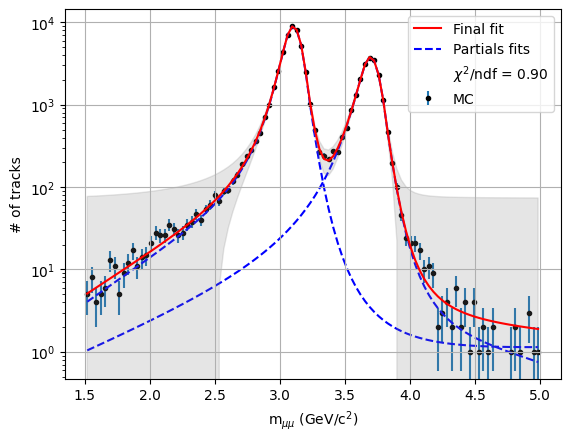

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_3899/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


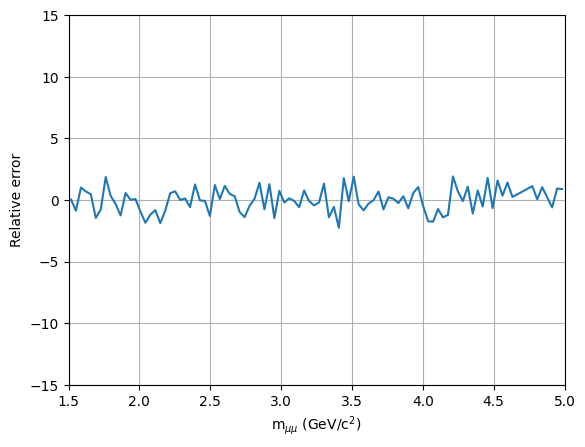

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

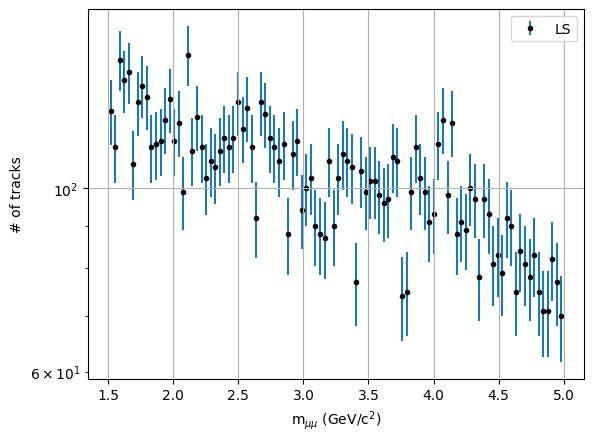

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [4.829607683420054, 4.706843314059752, 4.5861253569754865, 4.573391511095592, 4.223612580561418]
pcov: 
 [[ 1.96268753e-03 -3.40975973e-04  2.35495260e-04  1.43880917e-04
   3.54104208e-04]
 [-3.40975973e-04  3.56440991e-04  1.25525718e-05 -3.33564671e-05
  -2.03847966e-05]
 [ 2.35495260e-04  1.25525718e-05  4.19008943e-04  2.87272420e-04
   1.58056966e-04]
 [ 1.43880917e-04 -3.33564671e-05  2.87272420e-04  3.45236090e-04
  -2.93009922e-04]
 [ 3.54104208e-04 -2.03847966e-05  1.58056966e-04 -2.93009922e-04
   3.62050308e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 9.51141609e-02,  1.21211788e+00, -1.54176028e+00, -9.23772186e-01,
       -1.19688003e+00,  1.60323815e+00, -3.37127584e-01, -8.85184621e-01,
       -5.84806378e-01,  9.35577486e-01,  7.92375719e-01,  6.48575773e-01,
       -5.38036135e-02, -7.18215440e-01,  4.98714328e-01, -1.13099274e-01,
        1.92811165e+00, -2.27574290e+00,  5.69333499e-01, -5.07775478e-01,
        3.56907893e-01,  1.19784174e+00,  6.28497417e

fit error : 0.08187720462310784


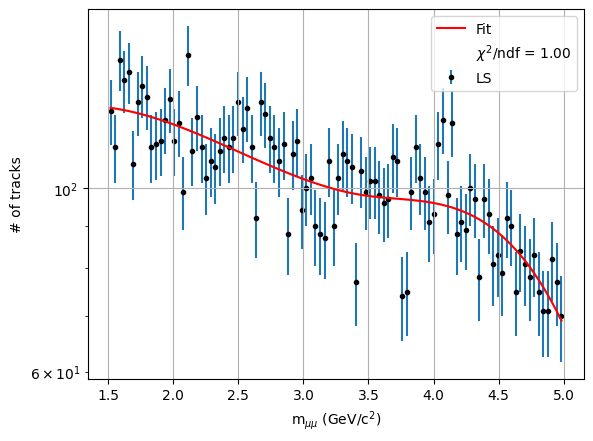

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

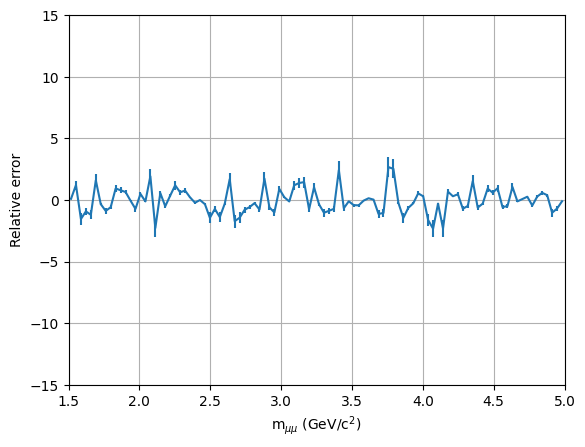

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

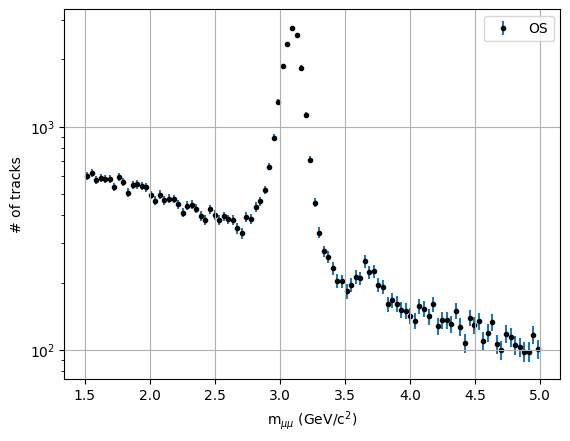

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2, y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2637.324812137307, 3.0979222880454262, 0.06609191587991388, 52.79776152690523, 3.6882224913782657, 0.05721521109007262, 6.4243097859473615, 5.917217335161353, 5.32260558713043, 5.1283627668882765, 4.609801678783516]
pcov: 
 [[ 1.79458868e+03  5.41212185e-03 -2.84638420e-02 -1.24595836e+00
  -5.47619530e-03  1.02170538e-02 -1.03371881e-02  1.54682063e-02
  -3.09617419e-03 -2.84100344e-03 -8.58341305e-03]
 [ 5.41212185e-03  1.14211342e-06 -2.62778911e-07 -1.18877220e-04
   4.32167433e-07 -9.26822893e-07 -4.07339672e-07  2.03761550e-06
   2.67022905e-06  1.21326473e-06  1.98153014e-06]
 [-2.84638420e-02 -2.62778911e-07  1.28429557e-06  1.44305062e-03
  -1.84292078e-06  4.71314655e-06 -3.11255522e-06 -6.60679763e-06
  -1.70634873e-05 -1.02047616e-05 -8.11651410e-06]
 [-1.24595836e+00 -1.18877220e-04  1.44305062e-03  2.04693083e+02
   1.97638750e-02 -1.35259739e-01 -2.42882920e-02 -1.44909637e-02
  -8.37065720e-02 -6.96374654e-02  1.02884760e-02]
 [-5.47619530e-03  4.32167433e-07 -

fit error : 44.71340823924842


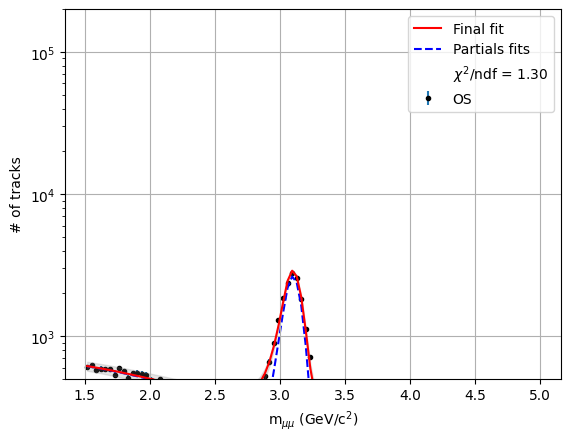

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

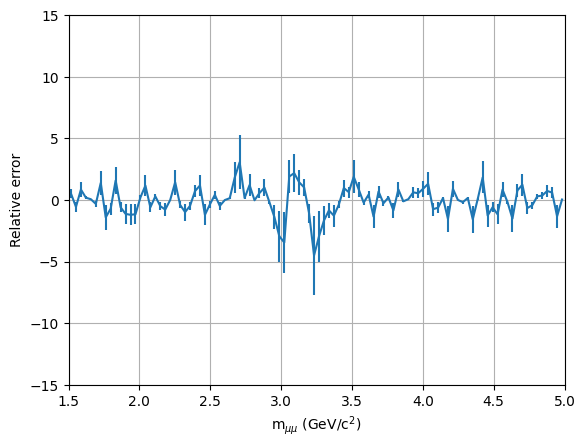

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
# Derivatives

def intervals(rel, alphaL, alphaR):
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    return I1, I2, I3


def dcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
    res[I2] = (np.exp(-(-mu + x)**2/(2*sig**2)))                                                                             [I2]
    res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
    return res

def dcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(sig*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (-N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2)                                                                                                                   ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(sig*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def dcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*(-mu + x)*np.exp(-np.abs(alphaL)**2/2)/(sig**2*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3                                                                                                                                     ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*(-mu + x)*np.exp(-np.abs(alphaR)**2/2)/(sig**2*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def IdcbdN(x, *args):
    return quad(dcbdN, start, stop, args=args)[0]

def Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdmu, start, stop, args=args)[0]

def Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdsig, start, stop, args=args)[0]

def sig2cb(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    return IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0,0]
    +Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1,1]
    +Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2,2]
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 1])
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 2])
    +2*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[1, 2])
    
N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = np.sqrt(sig2cb(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])) / ((stop - start)/bins)
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi)

TypeError: sig2cb() takes 9 positional arguments but 13 were given